In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
data = np.loadtxt('train_2008.csv', skiprows=1, delimiter=',')

In [3]:
X = data[:, 3:-1]
y = data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

l2 regularization
C = 0.010000
Training AUC = 0.778304
Test AUC = 0.761224
C = 0.100000
Training AUC = 0.779691
Test AUC = 0.761925
C = 1.000000
Training AUC = 0.780145
Test AUC = 0.762166
C = 10.000000
Training AUC = 0.780198
Test AUC = 0.762189
C = 100.000000
Training AUC = 0.780203
Test AUC = 0.762190


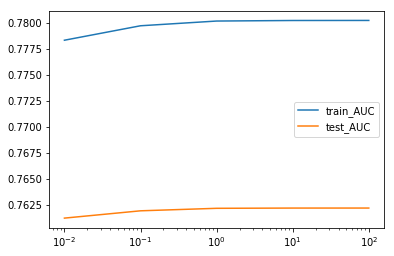

In [5]:
train_AUC, test_AUC = [], []
print('l2 regularization')
Cs = [.01, .1, 1, 10, 100]
for C in Cs:
    print('C = %f' % C)
    clf = LogisticRegression(solver='saga', max_iter=10000, C=C).fit(X_train, y_train)
    train_AUC.append(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
    test_AUC.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
    print('Training AUC = %f' % train_AUC[-1])
    print('Test AUC = %f' % test_AUC[-1])
plt.plot(Cs, train_AUC)
plt.plot(Cs, test_AUC)
plt.legend(['train_AUC', 'test_AUC'])
plt.xscale('log')
plt.show()

l1 regularization
C = 0.010000
Training AUC = 0.773257
Test AUC = 0.761918
C = 0.100000
Training AUC = 0.778642
Test AUC = 0.762342
C = 1.000000
Training AUC = 0.780222
Test AUC = 0.762411
C = 10.000000
Training AUC = 0.780321
Test AUC = 0.762264
C = 100.000000
Training AUC = 0.780327
Test AUC = 0.762241


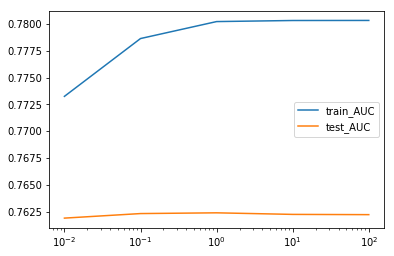

In [6]:
train_AUC, test_AUC = [], []
print('l1 regularization')
for C in [.01, .1, 1, 10, 100]:
    print('C = %f' % C)
    clf = LogisticRegression(solver='saga', max_iter=10000, C=C, penalty='l1').fit(X_train, y_train)
    train_AUC.append(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
    test_AUC.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
    print('Training AUC = %f' % train_AUC[-1])
    print('Test AUC = %f' % test_AUC[-1])
plt.plot(Cs, train_AUC)
plt.plot(Cs, test_AUC)
plt.legend(['train_AUC', 'test_AUC'])
plt.xscale('log')
plt.show()

In [7]:
test_2008 = np.loadtxt('test_2008.csv', skiprows=1, delimiter=',')
test_2012 = np.loadtxt('test_2012.csv', skiprows=1, delimiter=',')
X_2008 = test_2008[:, 3:]
X_2012 = test_2012[:, 3:]
print(X.shape)
print(X_2008.shape)
print(X_2012.shape)

(64667, 379)
(16000, 379)
(82820, 379)


In [8]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_2008 = scaler.transform(X_2008)
X_2012 = scaler.transform(X_2012)

In [9]:
clf = LogisticRegression(solver='saga', max_iter=10000, C=10, penalty='l1').fit(X, y)

In [14]:
pred_2008 = np.hstack((np.reshape(test_2008[:, 0], (test_2008.shape[0], 1)), np.reshape(clf.predict_proba(X_2008)[:, 1], (test_2008.shape[0], 1))))
pred_2012 = np.hstack((np.reshape(test_2012[:, 0], (test_2012.shape[0], 1)), np.reshape(clf.predict_proba(X_2012)[:, 1], (test_2012.shape[0], 1))))
np.savetxt("predictions_logit2008.csv", pred_2008, fmt = '%d,%21.20f', delimiter=',', header = 'id,target', comments='')
np.savetxt("predictions_logit2012.csv", pred_2012, fmt = '%d,%21.20f', delimiter=',', header = 'id,target', comments='')

In [99]:
top10 = np.argsort(abs(clf.coef_))[0, -10:]
print(top10)
print(clf.coef_[0, top10])

[204 105 191 300 192 183 202  40 349  54]
[-0.55858015 -0.58128802  0.65669932 -0.75700513  0.82828775 -0.85605876
 -1.38186336 -1.42784984  1.43286891  1.52887875]


In [100]:
with open('train_2008.csv') as f:
    l = f.readline().split(',')
print([l[ind + 3] for ind in top10])

['PRMJOCC1', 'PUHRCK12', 'PRAGNA', 'PXDW4WK', 'PRCOW1', 'PEIO1COW', 'PRMJIND1', 'PEMARITL', 'PRIMIND1', 'PRMARSTA']
